# Feature spaces, Linear Algebra, Numeric data methods, Linear Regression

## Part 1

    1. Feature space from csv file. Read data/ds_salaries.csv into a pandas dataframe
    2. Prune the dataset to only have columns: "work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size".
    3. Onehot encode "experience_level". Hint: look up pandas: get_dummies() method.
    4. labelencode "company_location"

In [25]:
import pandas as pd
import sklearn
%matplotlib inline
#1
data = pd.read_csv('../data/ds_salaries.csv')
data.head()




,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [26]:
#2
data = data[["work_year", "experience_level", "salary_in_usd", "job_title", "company_location", "company_size"]]
data.head()

,work_year,experience_level,salary_in_usd,job_title,company_location,company_size
0,2020,MI,79833,Data Scientist,DE,L
1,2020,SE,260000,Machine Learning Scientist,JP,S
2,2020,SE,109024,Big Data Engineer,GB,M
3,2020,MI,20000,Product Data Analyst,HN,S
4,2020,SE,150000,Machine Learning Engineer,US,L


In [27]:
#3
data = pd.get_dummies(data, columns=["experience_level"])
data.head()

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,DE,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,JP,S,0,0,0,1
2,2020,109024,Big Data Engineer,GB,M,0,0,0,1
3,2020,20000,Product Data Analyst,HN,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,US,L,0,0,0,1


In [28]:
from sklearn import preprocessing
#4
le = preprocessing.LabelEncoder()
data['company_location']= le.fit_transform(data['company_location'])
  
data.head()

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,12,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,29,S,0,0,0,1
2,2020,109024,Big Data Engineer,18,M,0,0,0,1
3,2020,20000,Product Data Analyst,20,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,48,L,0,0,0,1


    5. Normalize the company_location number (relative value between 0-1)
    6. Make binning of the salary column (both cut and qcut methods).
    7. Make a barplot with binned salaries to show the company size count for each of the bins. Like this:

Hint: Use pandas Series unstack() method to get a dataframe from a multiindex Series object (The result of making a groupby count on both salary_bins and company_size columns

In [29]:
#5
df_arr = data['company_location'].values.reshape(-1,1)
data['company_location'] = preprocessing.normalize(df_arr,axis=0)
data.head()


,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,2020,79833,Data Scientist,0.012393,L,0,0,1,0
1,2020,260000,Machine Learning Scientist,0.029950,S,0,0,0,1
2,2020,109024,Big Data Engineer,0.018590,M,0,0,0,1
3,2020,20000,Product Data Analyst,0.020655,S,0,0,1,0
4,2020,150000,Machine Learning Engineer,0.049573,L,0,0,0,1


In [30]:
#6
label = ['S','M','L','XL']
data['salary_cut'] = pd.cut(data['salary_in_usd'], bins=4, labels=label)
data['salary_cut'].value_counts() 
data

,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,salary_cut
0,2020,79833,Data Scientist,0.012393,L,0,0,1,0,S
1,2020,260000,Machine Learning Scientist,0.029950,S,0,0,0,1,M
2,2020,109024,Big Data Engineer,0.018590,M,0,0,0,1,S
3,2020,20000,Product Data Analyst,0.020655,S,0,0,1,0,S
4,2020,150000,Machine Learning Engineer,0.049573,L,0,0,0,1,S
...,...,...,...,...,...,...,...,...,...,...
602,2022,154000,Data Engineer,0.049573,M,0,0,0,1,M
603,2022,126000,Data Engineer,0.049573,M,0,0,0,1,S
604,2022,129000,Data Analyst,0.049573,M,0,0,0,1,S
605,2022,150000,Data Analyst,0.049573,M,0,0,0,1,S


In [31]:
data['salary_qcut'] = pd.qcut(data['salary_in_usd'], q=4)
data.head()


,work_year,salary_in_usd,job_title,company_location,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,salary_cut,salary_qcut
0,2020,79833,Data Scientist,0.012393,L,0,0,1,0,S,"(62726.0, 101570.0]"
1,2020,260000,Machine Learning Scientist,0.029950,S,0,0,0,1,M,"(150000.0, 600000.0]"
2,2020,109024,Big Data Engineer,0.018590,M,0,0,0,1,S,"(101570.0, 150000.0]"
3,2020,20000,Product Data Analyst,0.020655,S,0,0,1,0,S,"(2858.999, 62726.0]"
4,2020,150000,Machine Learning Engineer,0.049573,L,0,0,0,1,S,"(101570.0, 150000.0]"


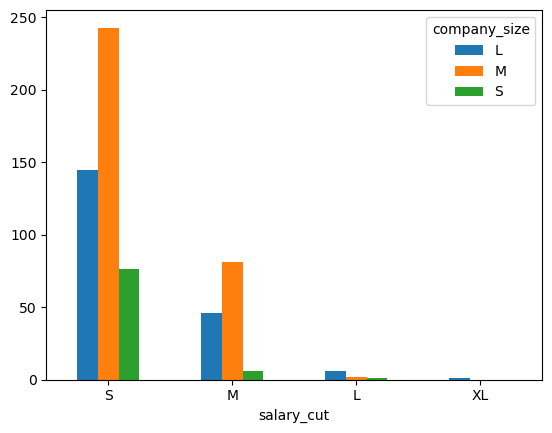

company_size    L    M   S
salary_cut                
S             145  243  76
M              46   81   6
L               6    2   1
XL              1    0   0


In [32]:
#7
import matplotlib.pyplot as plt
#data['salary_cut'].value_counts().plot(kind='bar')
d =data.groupby(['salary_cut','company_size']).size()
p = d.unstack()
p.plot(kind='bar',stacked=False, rot=0)
plt.show()
print(p)



# Part 2

    8. Make it into a function that can take either company_size or experience_level as arguments.
    9. Change the experience_level column to be numeric using this dictionary: experience = {'EN':10,'EX':20,'MI':30,'SE':40}. Hint: Here.
    10. Use seaborn pairplot to see if there is an approximately linear relationship between experience_level and salary
    11. scatter Plot the 2d feature space of 'experience_level' and 'salary_in_usd
    12. Use sklearn to find the best possible linear relationship between experience_level and salary_in_usd using linear regression.


In [52]:
#8
def myfunc(company_size=None, experience_level=None):
    pass

In [34]:
#9
df = pd.read_csv('../data/ds_salaries.csv')
experience = {'EN':10,'EX':20,'MI':30,'SE':40}
df.replace({'experience_level': experience},inplace=True)
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,30,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,40,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,40,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,30,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,40,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


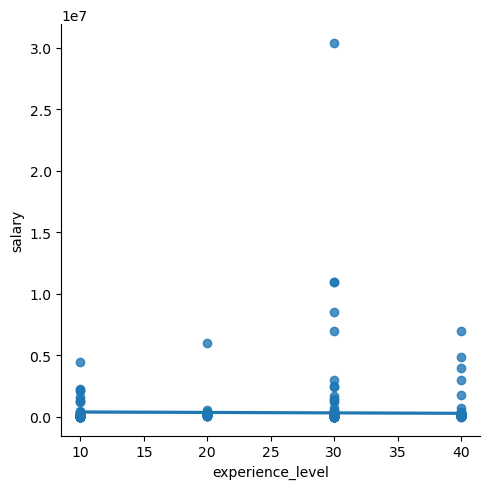

In [60]:
#10
import seaborn as sb
pp = sb.lmplot(x ='experience_level', y ='salary', data = df)
pp

<AxesSubplot: xlabel='experience_level', ylabel='salary_in_usd'>

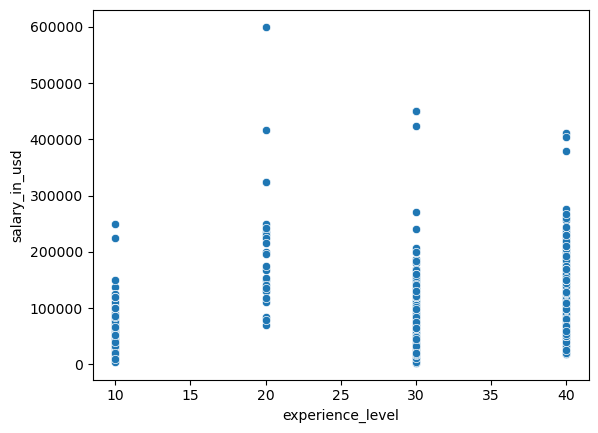

In [40]:
#11
sp = sb.scatterplot(data = df, x='experience_level', y='salary_in_usd')
sp

In [57]:
#12
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

experience_data = df[['experience_level']].values
salary_data = df[['salary_in_usd']].values
x = scale(experience_data)
y = scale(salary_data)
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.09942189372989474

# Part 3: Linear Algebra

Given the below dictionarys find out where each of the 4 people find the cheapest shopping according to their needs.

shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}

Hint: you can use pandas and Transpose to create dataframe: pd.DataFrame(shoppers).T to get the necessary shape of the dataframe/matrix. Also use df.to_numpy() to changes a Pandas DataFrame df into a numpy ndarray with only the numeric data

In [53]:
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}

shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}

df_shoppers = pd.DataFrame(shoppers).T
df_prices = pd.DataFrame(shop_prices)
print(df_shoppers,"\n")
print(df_prices,"\n")

r = df_shoppers.dot(df_prices)
r

         Is  Juice  Kakao  Lagkager
Paula     4      2      3         2
Peter     2      5      0         4
Pandora   5      3      4         5
Pietro    1      8      9         1 

          Netto  Fakta
Is        10.50   4.00
Juice      2.25   4.50
Kakao      4.50   6.25
Lagkager  33.50  20.00 



,Netto,Fakta
Paula,127.00,83.75
Peter,166.25,110.50
Pandora,244.75,158.50
Pietro,102.50,116.25
